# ShanghaiTech visualize annotation

In this kernel, we will visualize anotation point for some image in ShanghaiTech dataset.
The visualization include: 

- The image
- The image with red-dot annotated 
- Density map generated from image and anotatation

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [25]:
from matplotlib import cm as CM
import PIL.Image as Image
import os
import h5py
import scipy
from scipy.io import loadmat
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json

In [7]:
# print(os.listdir("../input/shanghaitech_with_people_density_map/ShanghaiTech/part_A/train_data/ground-truth/"))

# File path 

- image_path: jpg file
- mat_path: mat file contain annotation, usually included in dataset 
- density map: generated from image and anotatation by method propose by  Single-Image Crowd Counting via Multi-Column Convolutional Neural Network (CVPR2016). Check demo code here: https://www.kaggle.com/tthien/shanghaitech-a-train-density-gen#L23 

In [8]:
root = "/data/my_crowd_image/street_20201127/data_batch2/"
name = "IMG_20201127_161331_514"
image_path = "/data/my_crowd_image/street_20201127/data_batch2/images/IMG_20201127_161331_514.jpg"
density_map_path = "/data/my_crowd_image/street_20201127/data_batch2/ground-truth-h5/IMG_20201127_161331_514.h5"
mat_path = "/data/my_crowd_image/street_20201127/data_batch2/jsons/IMG_20201127_161331_514.json"

# Image

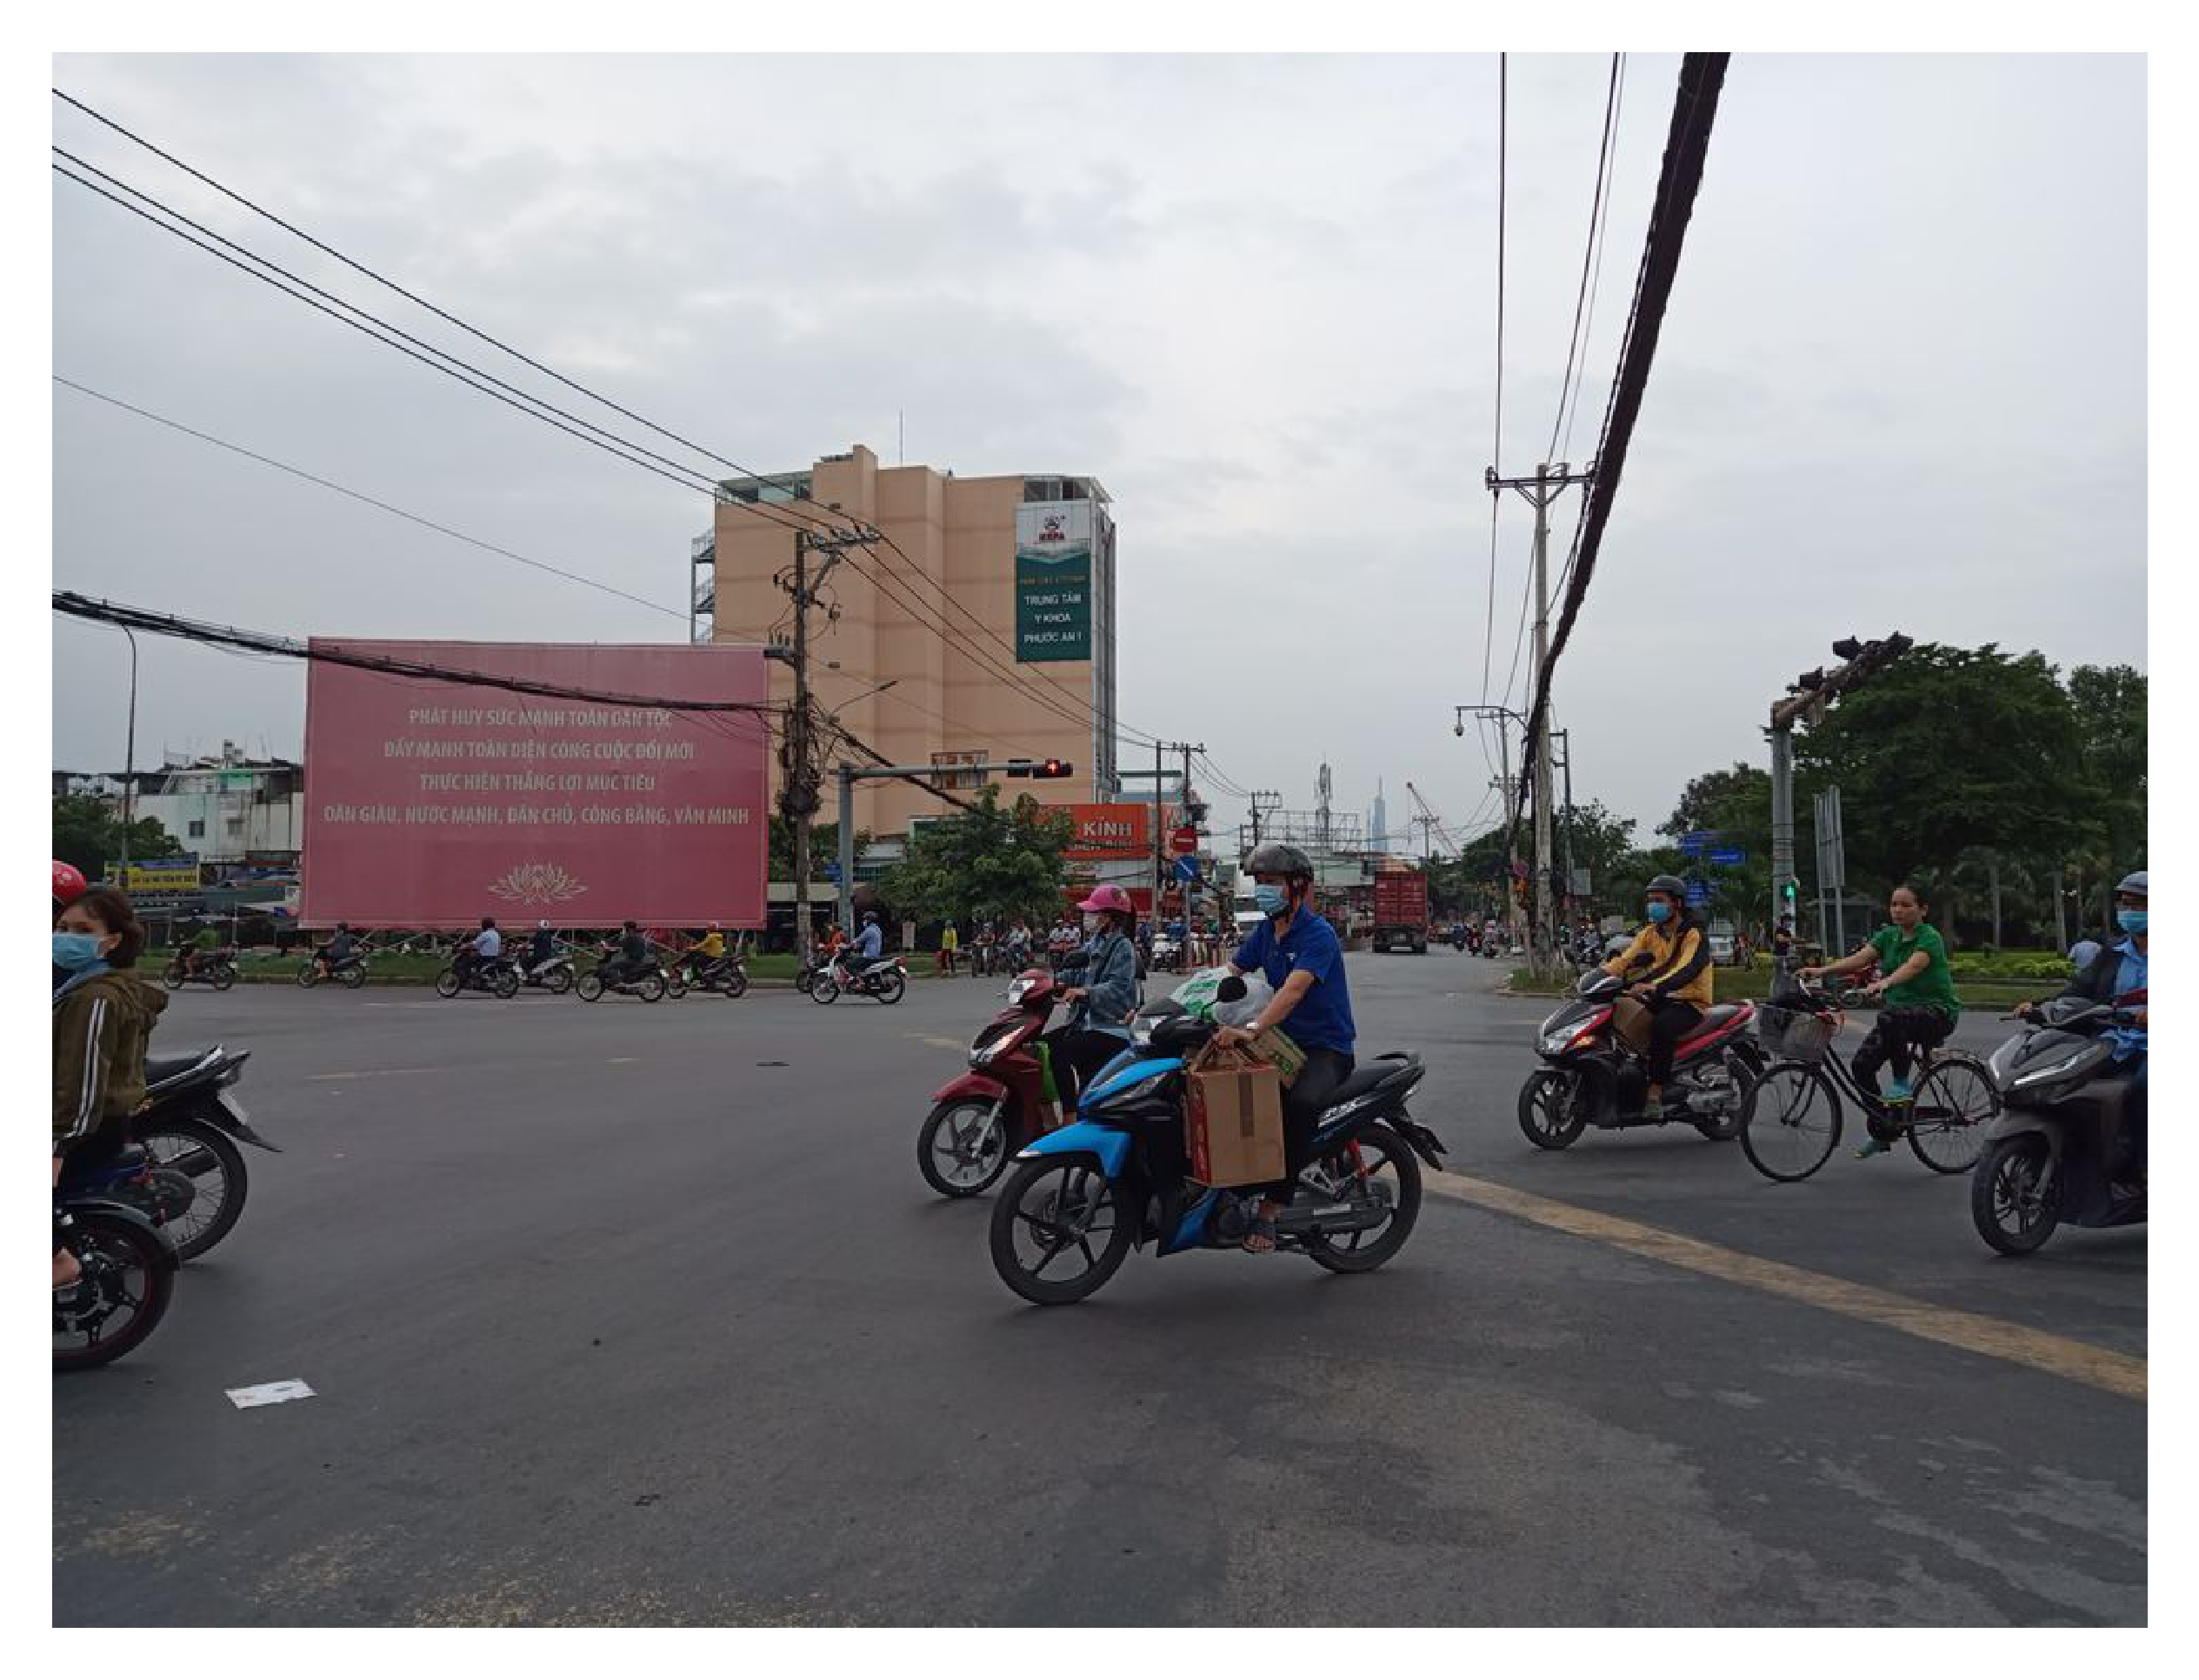

In [9]:
from matplotlib import pyplot as plt

#now see a sample from ShanghaiA
plt.figure(dpi=600)
plt.axis('off')
plt.margins(0,0)
plt.imshow(Image.open(image_path))

In [10]:
img = Image.open(image_path)
img_matrix = np.array(img)
img_matrix.shape

(752, 1000, 3)

# Density Map

In [11]:
# gt_file = h5py.File(density_map_path,'r')
# groundtruth = np.asarray(gt_file['density'])
# plt.figure(dpi=600)
# plt.axis('off')
# plt.imshow(groundtruth,cmap=CM.jet)

In [12]:
# groundtruth.shape

In [13]:
def show_density(density, name):
    plt.figure(dpi=600)
    plt.axis('off')
    plt.margins(0, 0)
    
    plt.imshow(density, cmap=CM.jet)
    plt.savefig(name, dpi=600, bbox_inches='tight', pad_inches=0)

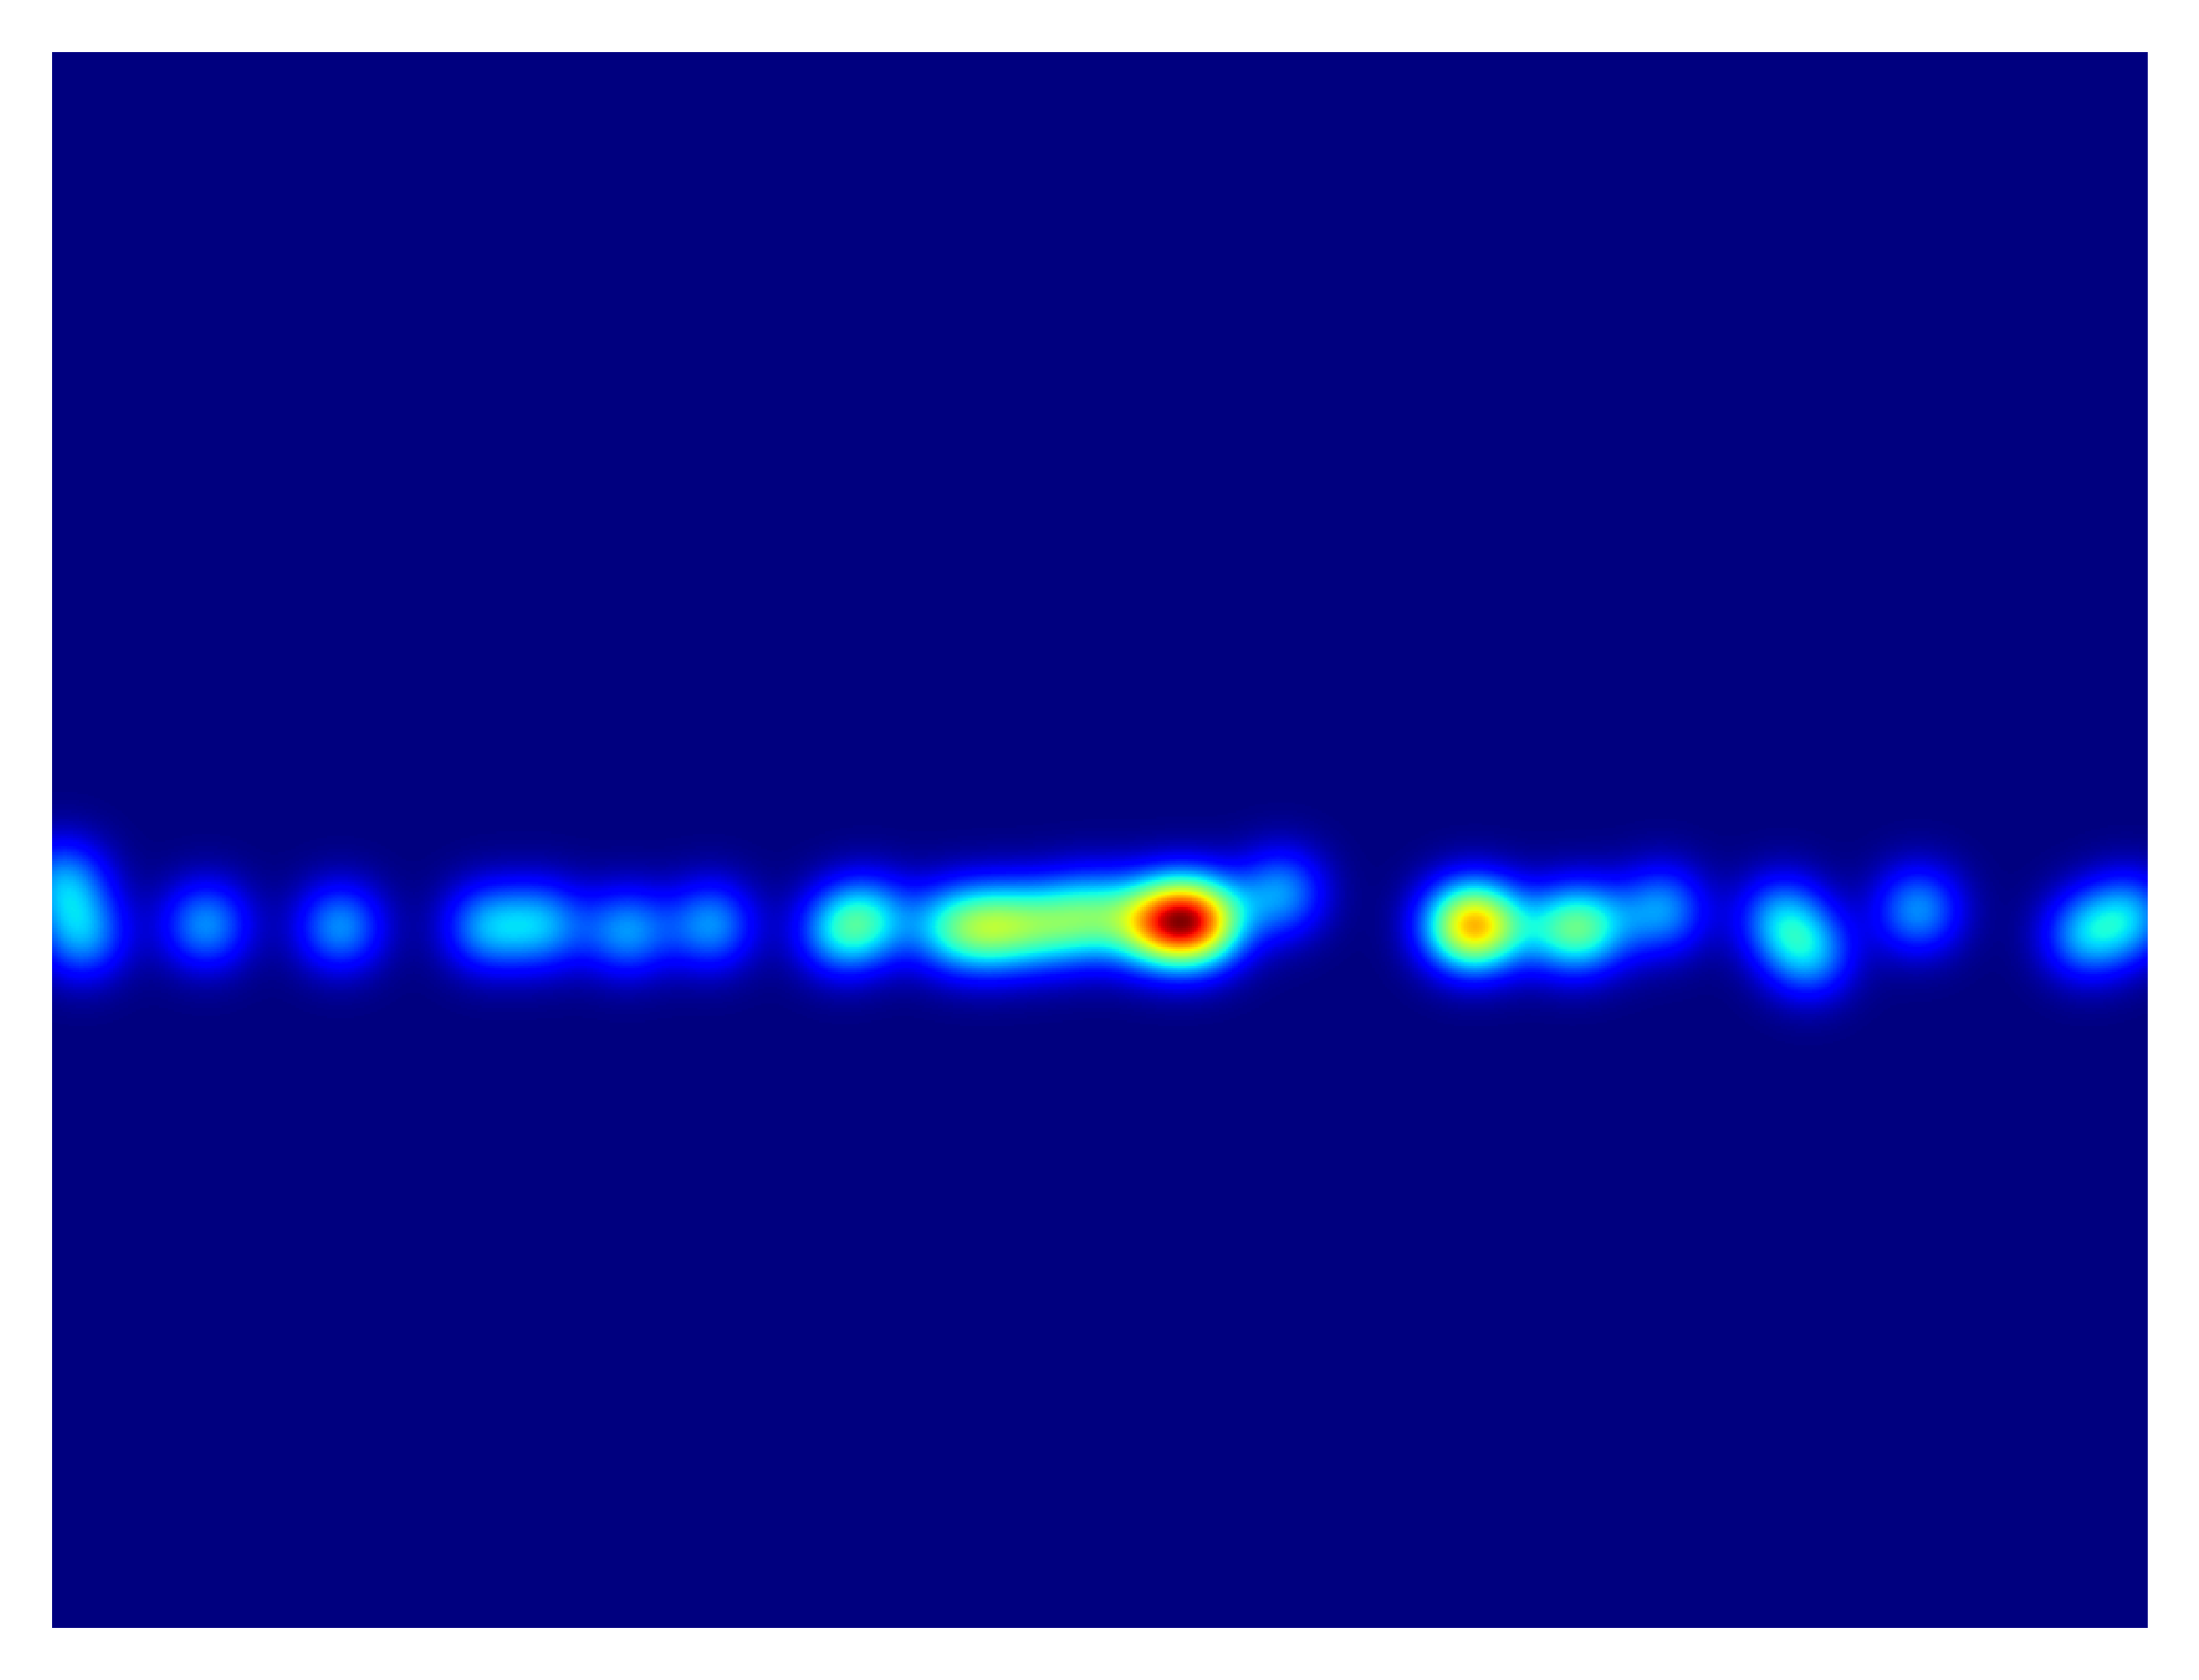

In [14]:
gt_file = h5py.File(density_map_path,'r')
groundtruth = np.asarray(gt_file['density'])
show_density(groundtruth, "density.png")

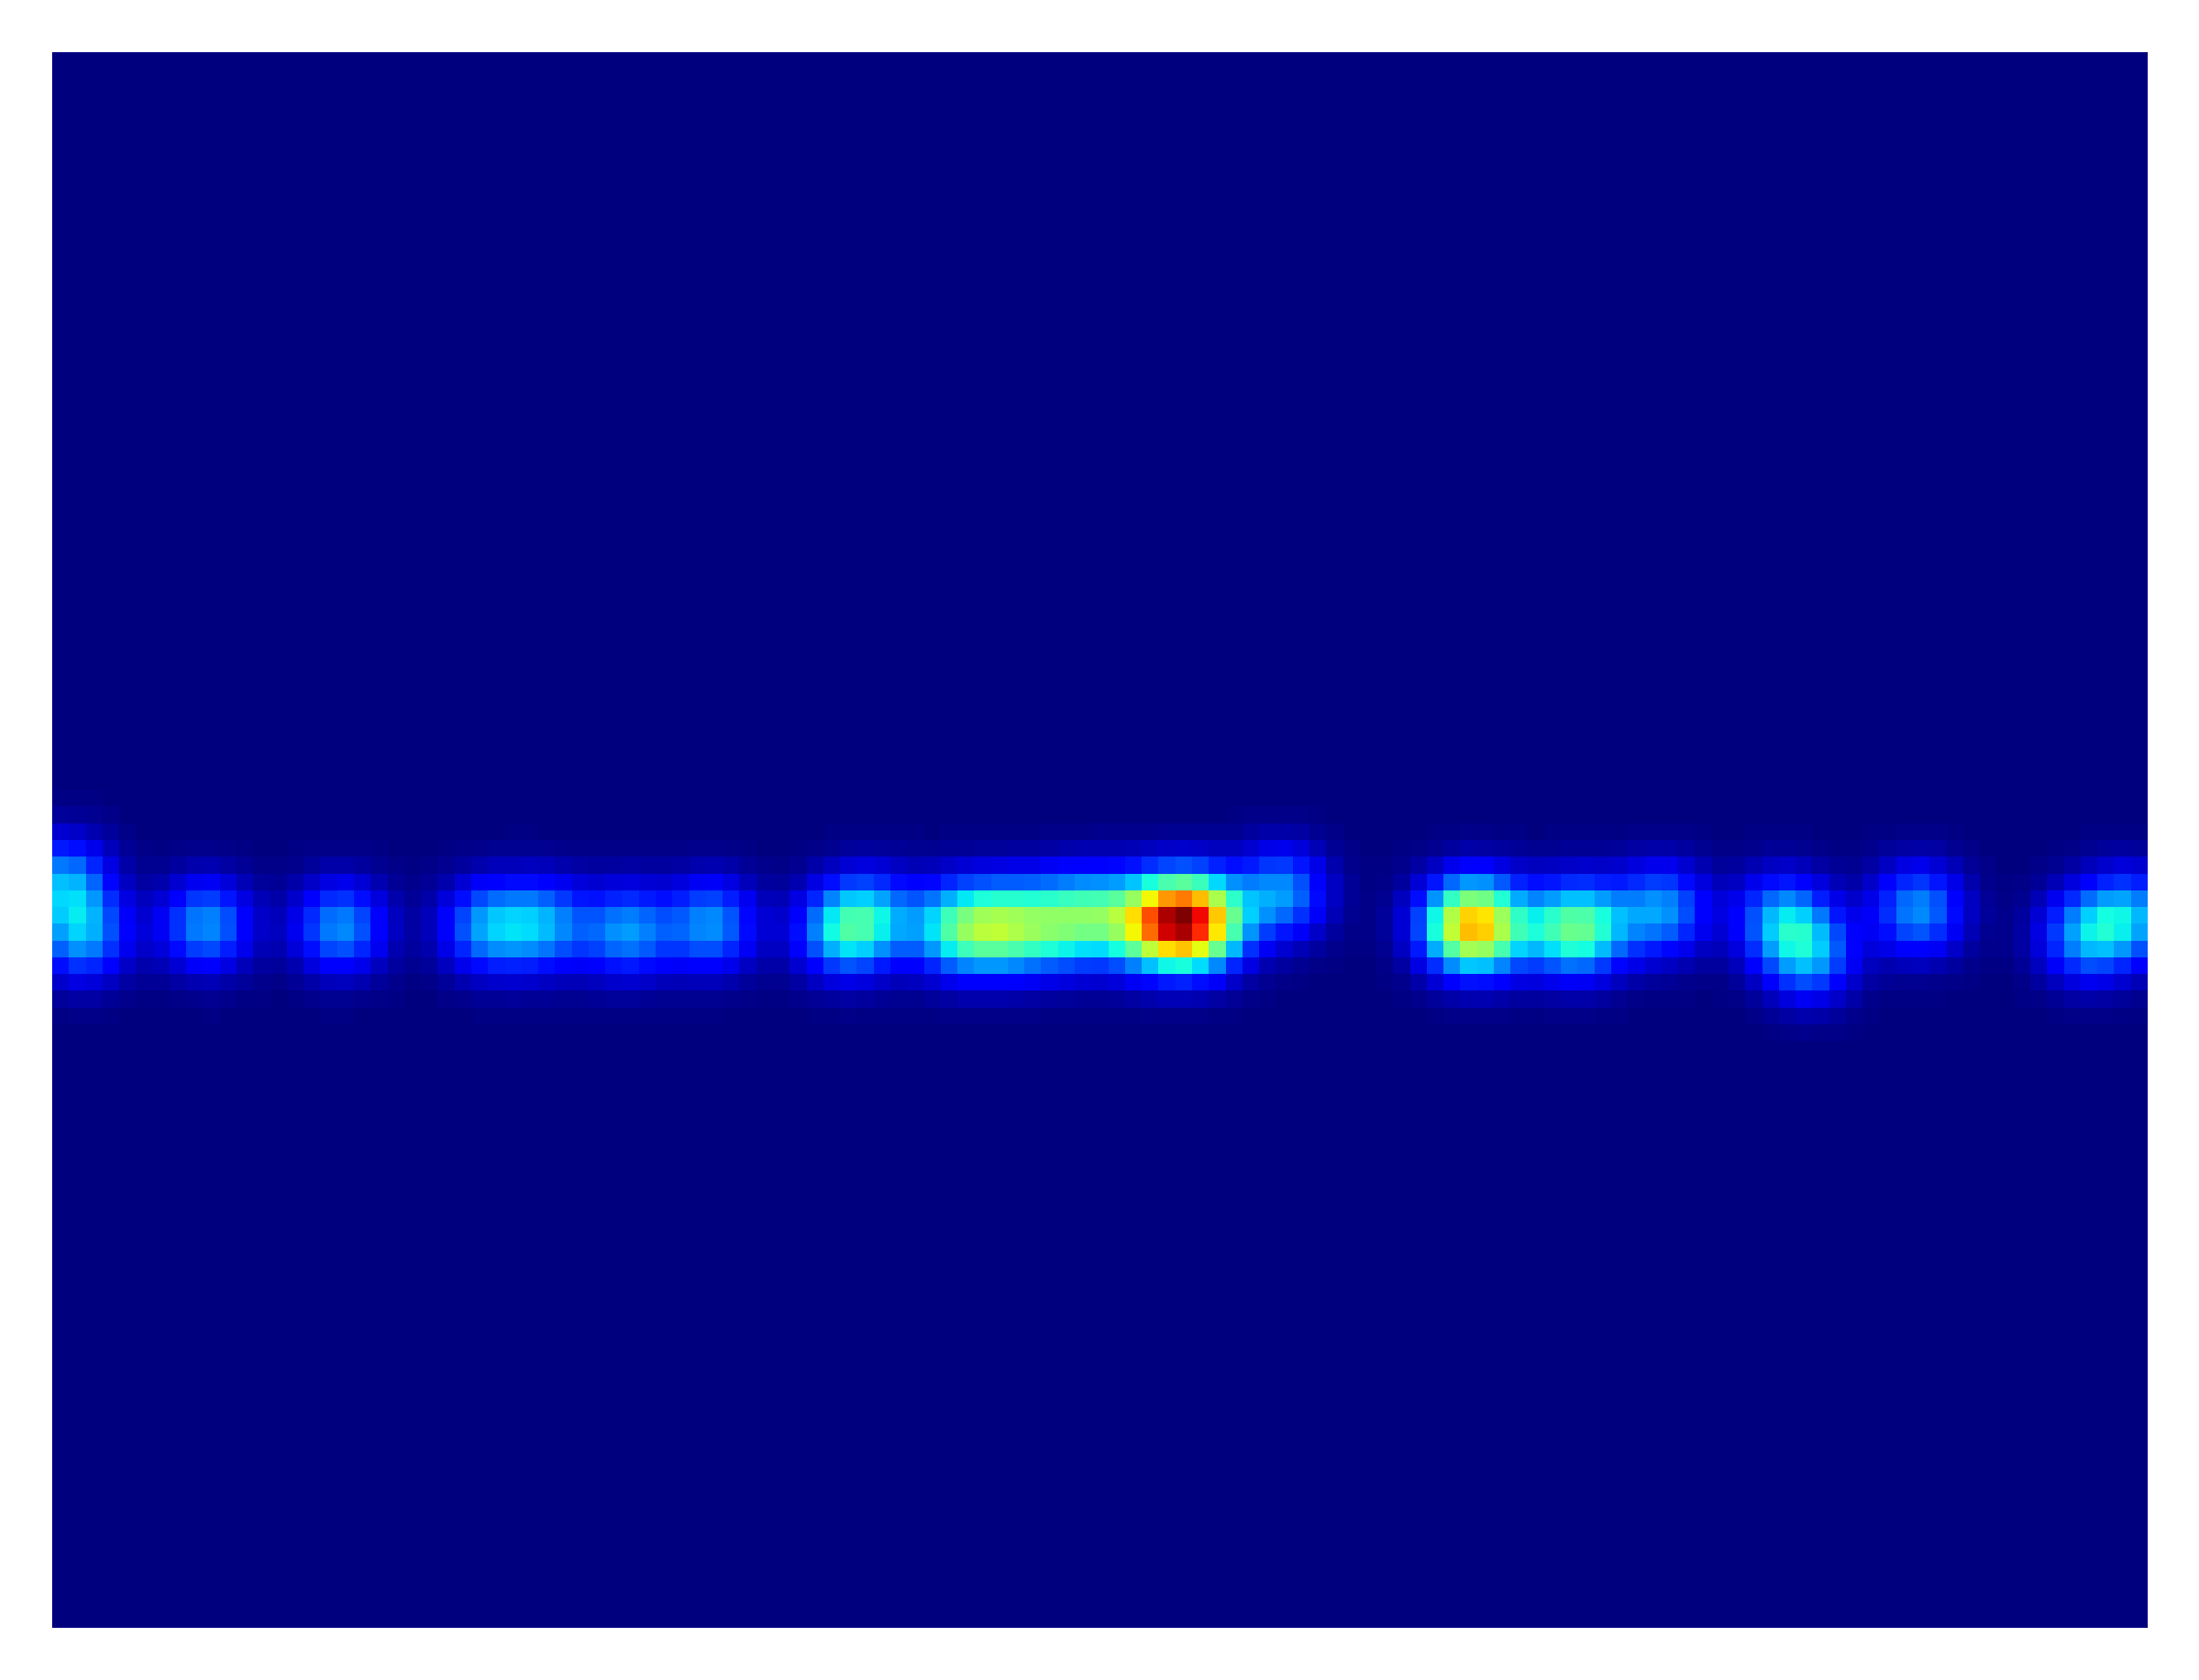

In [16]:
import cv2
groundtruth_resize = cv2.resize(groundtruth,(int(groundtruth.shape[1]/8), int(groundtruth.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64
show_density(groundtruth_resize, "density_resize.png")

In [17]:
# gt_file = h5py.File(density_map_path,'r')
# groundtruth = np.asarray(gt_file['density'])
# plt.figure(dpi=600)
# plt.axis('off')
# plt.margins(0,0)
# plt.imshow(groundtruth*100, cmap= CM.jet)
# plt.savefig('img262_density.png', dpi=600, bbox_inches='tight',pad_inches=0)# 

In [18]:
groundtruth.shape

(752, 1000)

In [19]:
print("count by ground truth sum " + str(groundtruth.sum()))

count by ground truth sum 31.166319


In [20]:
type(groundtruth)

numpy.ndarray

In [16]:
# mumber of user
groundtruth.sum()

212.41875

# Annotation


In [26]:
# load img matrix
img = Image.open(image_path)
img_matrix = np.array(img)
img_matrix.shape

(752, 1000, 3)

In [34]:

# load point gt from mat
# mat = scipy.io.loadmat(mat_path)
img_matrix_annotated = np.copy(img_matrix)
img_matrix_blank = np.zeros(img_matrix.shape)
k = np.zeros((img_matrix.shape[0], img_matrix.shape[1]))
# gt = mat["image_info"][0, 0][0, 0][0]

In [35]:
def prepare_point_from_json(json_path):
    """

    :param json_path: full json path including .json
    :return: [(x,y),(x,y)], a list of tuples
    """
    coord_list = []
    with open(json_path) as json_file:
        json_data = json.load(json_file)
        pts = json_data['points']
        for pt in pts:
            tup = (int(pt['x']), int(pt['y']))
            coord_list.append(tup)
    return coord_list

In [36]:
gt = prepare_point_from_json(mat_path)

In [37]:
gt.shape

AttributeError: 'list' object has no attribute 'shape'

In [38]:
print("there are total " + str(gt.shape[0]) + " people")

AttributeError: 'list' object has no attribute 'shape'

In [39]:
for i in range(0, len(gt)):
    if int(gt[i][1]) < img_matrix_annotated.shape[0] and int(gt[i][0]) < img_matrix_annotated.shape[1]:
        img_matrix_annotated[int(gt[i][1]), int(gt[i][0]), 0] = 255 # annotated point
        # make the point on figure bigger for visual 
        img_matrix_annotated[int(gt[i][1]+1), int(gt[i][0]), 0] = 255 # 
        img_matrix_annotated[int(gt[i][1]), int(gt[i][0]+1), 0] = 255 # 
        img_matrix_annotated[int(gt[i][1]+1), int(gt[i][0]+1), 0] = 255 #         

In [40]:
for i in range(0, len(gt)):
    if int(gt[i][1]) < img_matrix_blank.shape[0] and int(gt[i][0]) < img_matrix_blank.shape[1]:
        img_matrix_blank[int(gt[i][1]), int(gt[i][0]), 0] = 255 # annotated point
        # make the point on figure bigger for visual 
        img_matrix_blank[int(gt[i][1]+1), int(gt[i][0]), 0] = 255 # 
        img_matrix_blank[int(gt[i][1]), int(gt[i][0]+1), 0] = 255 # 
        img_matrix_blank[int(gt[i][1]+1), int(gt[i][0]+1), 0] = 255 #   
        img_matrix_blank[int(gt[i][1]+2), int(gt[i][0]+1), 0] = 255 #   
        img_matrix_blank[int(gt[i][1]+1), int(gt[i][0]+2), 0] = 255 #   
        
        img_matrix_blank[int(gt[i][1]+2), int(gt[i][0]), 0] = 255 # 
        img_matrix_blank[int(gt[i][1]), int(gt[i][0]+2), 0] = 255 # 

In [41]:
# #now see a sample from ShanghaiA
# plt.figure(dpi=600, frameon = False)
# plt.axis('off')
# plt.imshow(img_matrix_annotated)

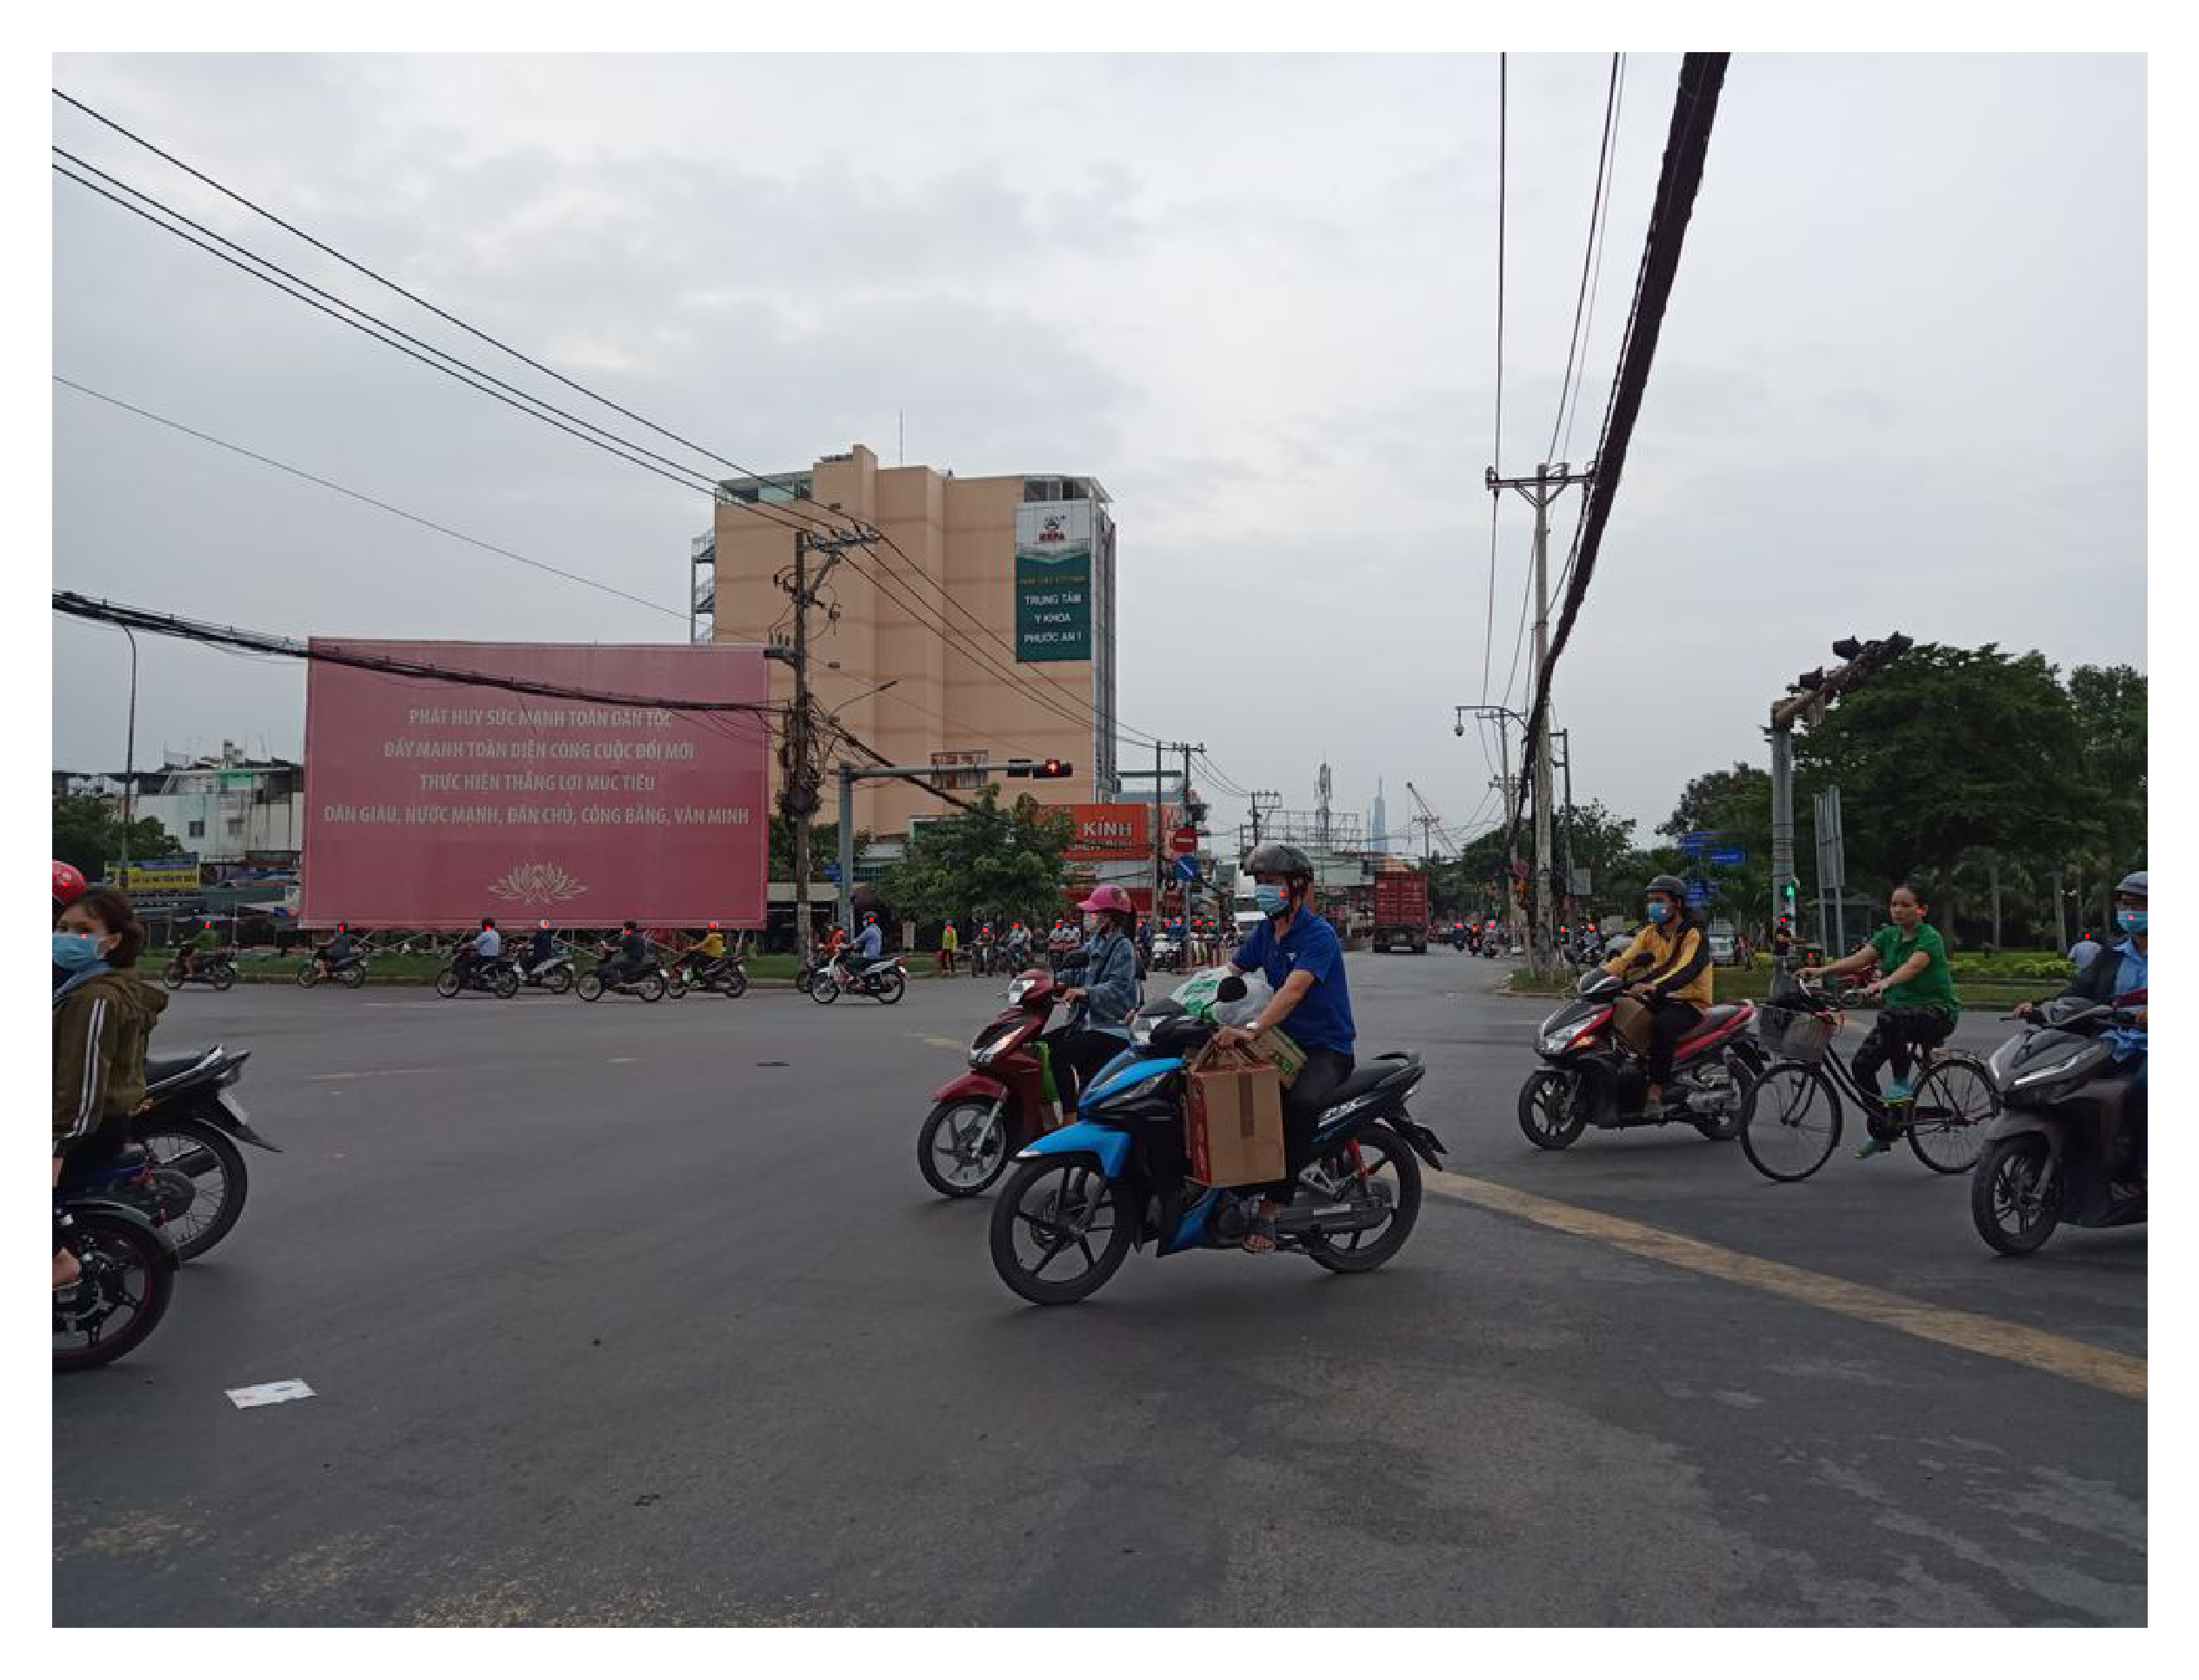

In [42]:
#now see a sample from ShanghaiA
import matplotlib.cm as cm
plt.figure(dpi=600, frameon = False)
plt.axis('off')
plt.margins(0,0)
plt.imshow(img_matrix_annotated)
plt.savefig('img262_annotate.png', dpi=600, bbox_inches='tight',pad_inches=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


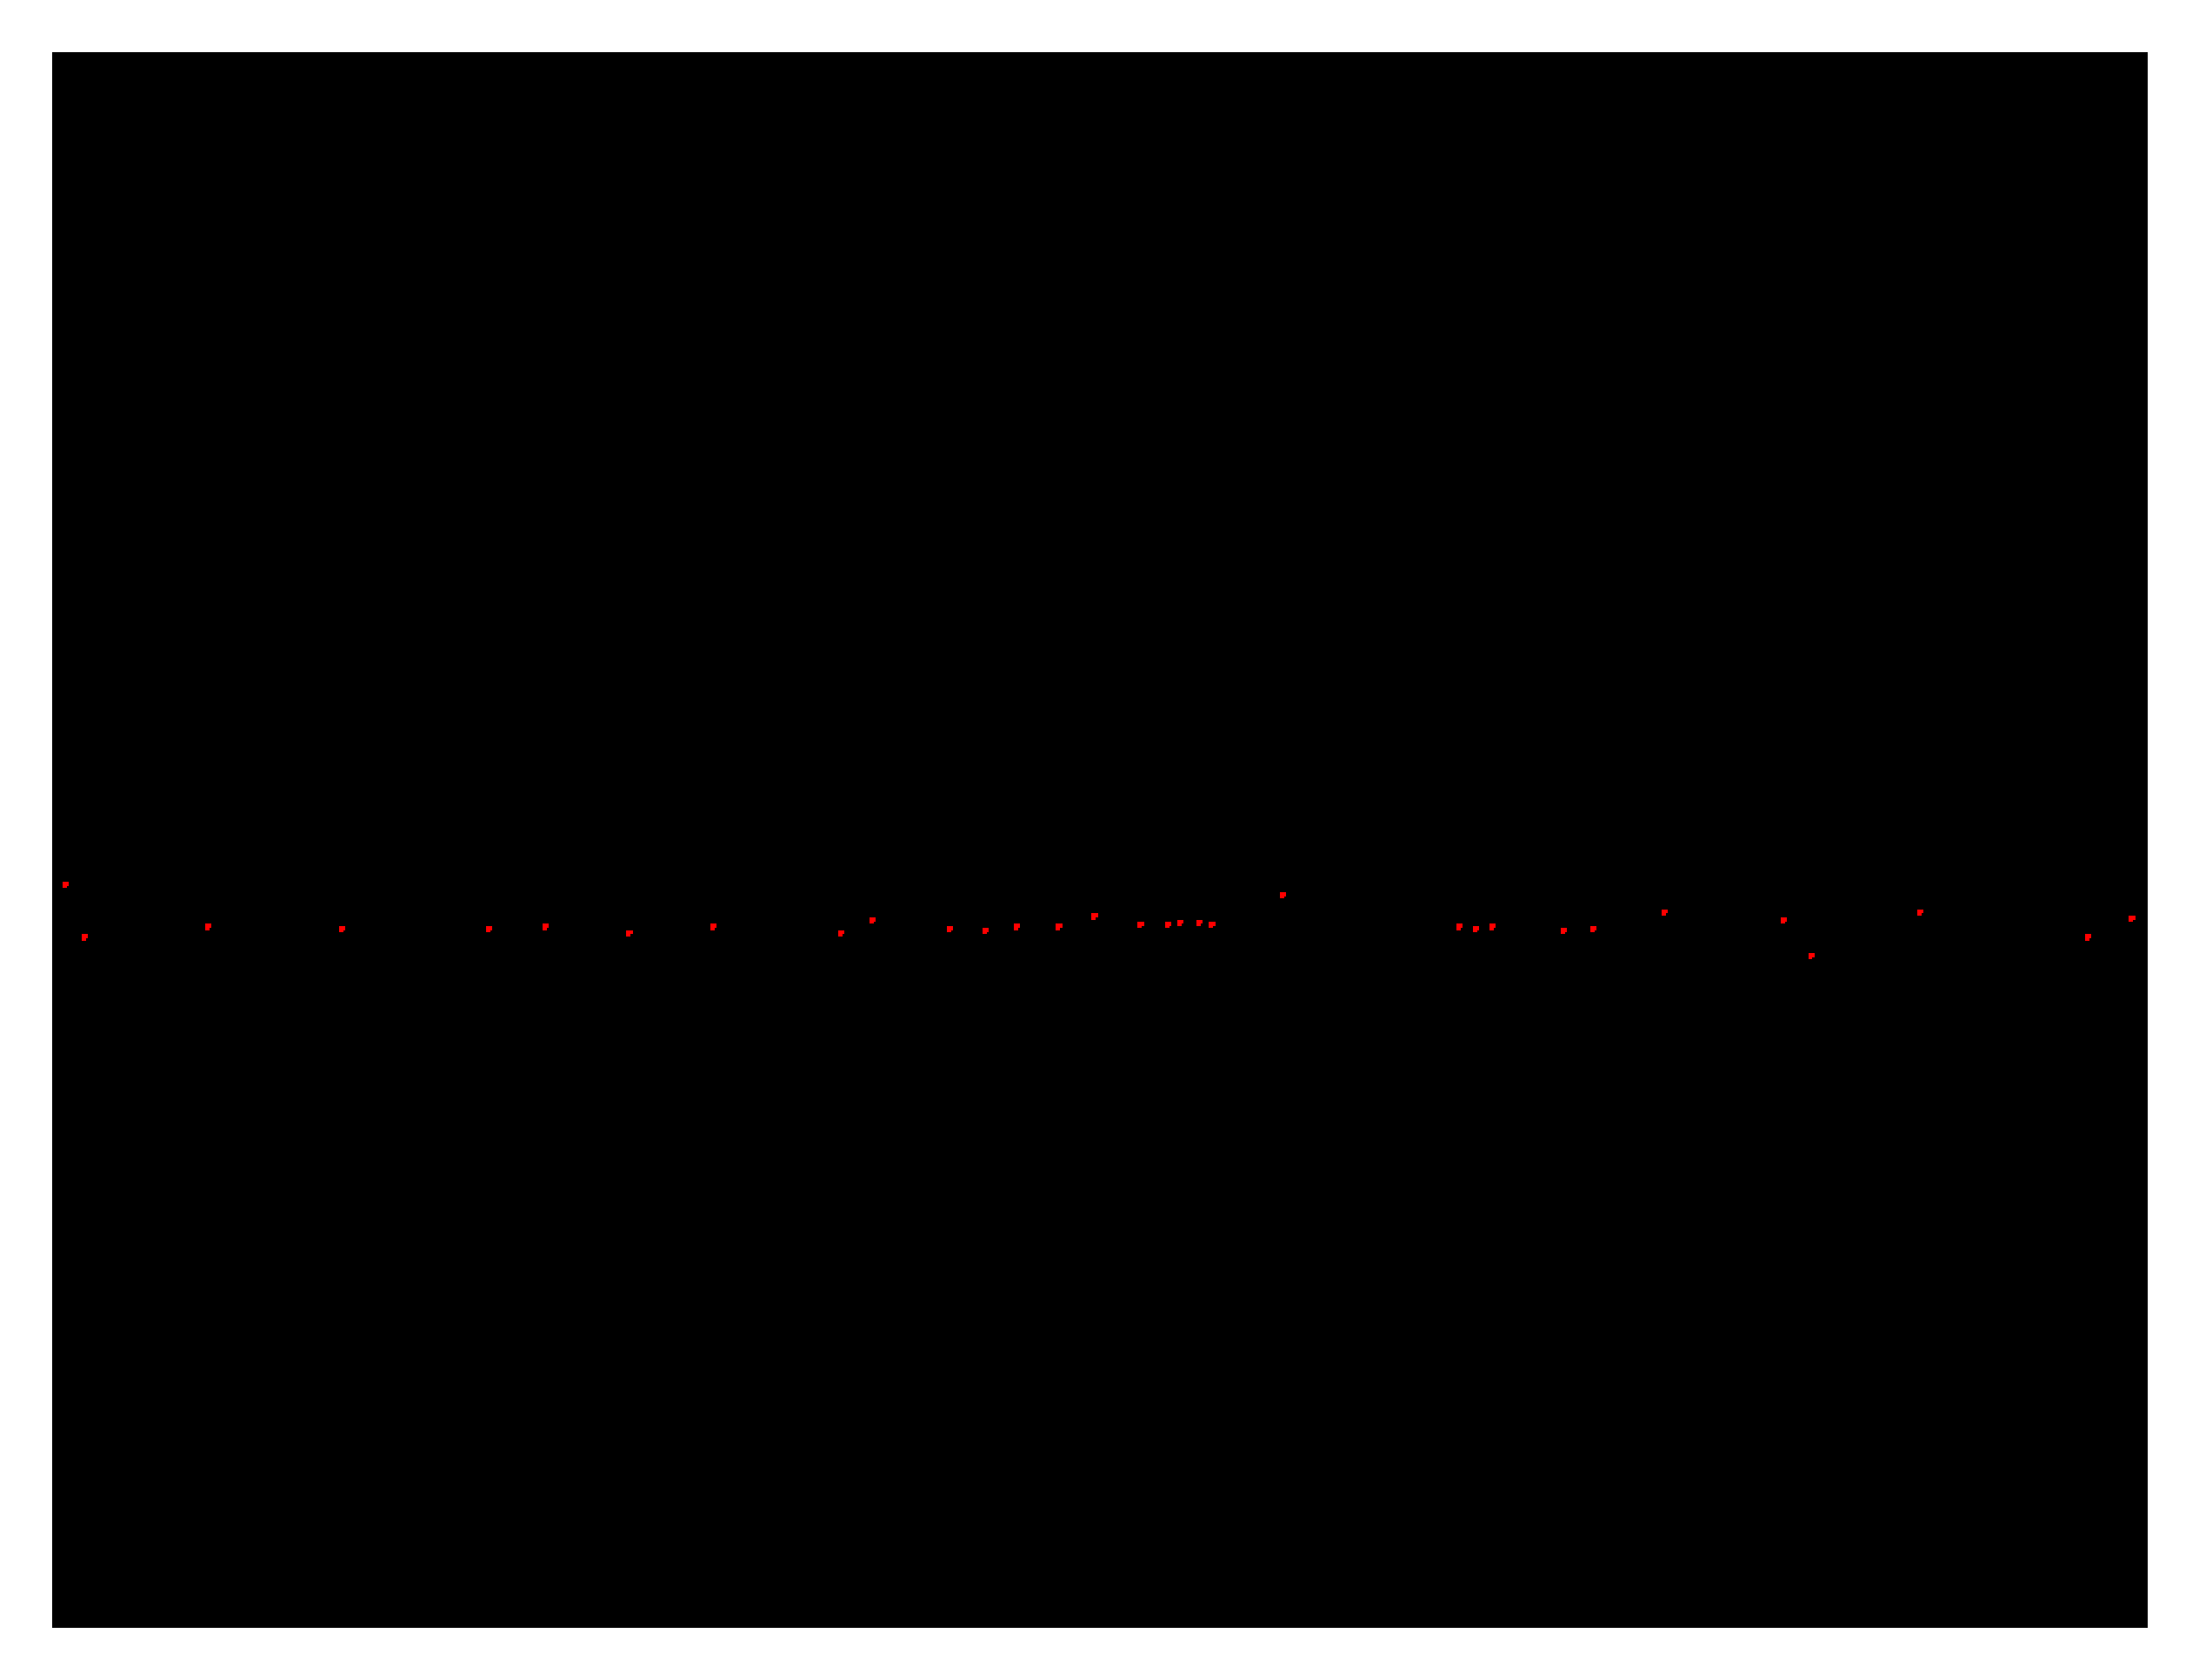

In [43]:
#now see a sample from ShanghaiA
import matplotlib.cm as cm
plt.figure(dpi=600, frameon = False)
plt.axis('off')
plt.margins(0,0)
plt.imshow(img_matrix_blank)
plt.savefig('img262_annotate_blank.png', dpi=600, bbox_inches='tight',pad_inches=0)

In [46]:
print("there are total " + str(len(gt)) + " people")

there are total 32 people


In [47]:
print("count by ground truth sum " + str(groundtruth.sum()))

count by ground truth sum 31.166319


In [ ]:
gt.shape[0]